In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
#Upload the Dataset
uploaded = files.upload()  # Manually upload your dataset

# Load the dataset (replace 'your_dataset.csv' with the actual dataset path)
data = pd.read_csv('Student_Depression_Dataset_Updated.csv')

Saving Student_Depression_Dataset_Updated.csv to Student_Depression_Dataset_Updated (2).csv


Class distribution:
 Depression
1.0    15209
0.0    10739
Name: count, dtype: int64


<ipython-input-36-983b77687f30>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


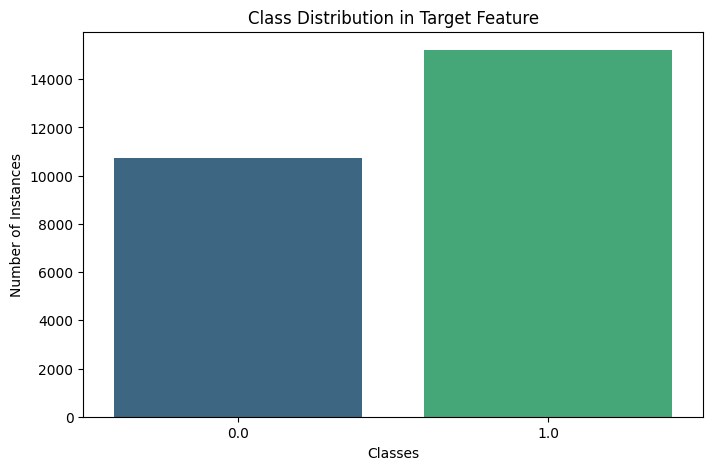

In [ ]:
# Check distribution of unique classes in the target feature
class_distribution = data['Depression'].value_counts()

print("Class distribution:\n", class_distribution)

# Plot the class distribution using a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Class Distribution in Target Feature')
plt.xlabel('Classes')
plt.ylabel('Number of Instances')
plt.show()

In [ ]:
# 1. Handle missing values
# Check for null values
print("Null values in dataset:\n", data.isnull().sum())

# Impute numerical columns with mean, categorical with mode
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical columns
num_data = data.select_dtypes(include=['int64', 'float64'])
data[num_data.columns] = num_imputer.fit_transform(num_data)

# Impute categorical columns
cat_data = data.select_dtypes(include=['object'])

for column in cat_data.columns:
    if data[column].isnull().any():
        # Impute using mode
        data[column] = cat_imputer.fit_transform(data[column].values.reshape(-1, 1)).ravel()



print("\nAfter handling missing values:\n", data.isnull().sum())

Null values in dataset:
 id                                          0
Gender                                      0
Age                                         0
City                                        0
Profession                                  0
Academic Pressure                           0
Work Pressure                               0
CGPA                                     1953
Study Satisfaction                       1953
Job Satisfaction                            0
Sleep Duration                              0
Dietary Habits                           1953
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                         1953
Financial Stress                            3
Family History of Mental Illness            0
Depression                               1953
dtype: int64

After handling missing values:
 id                                       0
Gender                                   0
Age            

In [ ]:
# 2. Encode categorical values
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

print("\nEncoded dataset sample:\n", data.head())


Encoded dataset sample:
      id  Gender   Age  City  Profession  Academic Pressure  Work Pressure  \
0   2.0       1  33.0    51          11                5.0            0.0   
1   8.0       0  24.0     3          11                2.0            0.0   
2  26.0       1  31.0    44          11                3.0            0.0   
3  30.0       0  28.0    49          11                3.0            0.0   
4  32.0       0  25.0    16          11                4.0            0.0   

   CGPA  Study Satisfaction  Job Satisfaction  Sleep Duration  Dietary Habits  \
0  8.97                 2.0               0.0               0               0   
1  5.90                 5.0               0.0               0               1   
2  7.03                 5.0               0.0               2               0   
3  5.59                 2.0               0.0               1               1   
4  8.13                 3.0               0.0               0               1   

   Degree  Have you ever

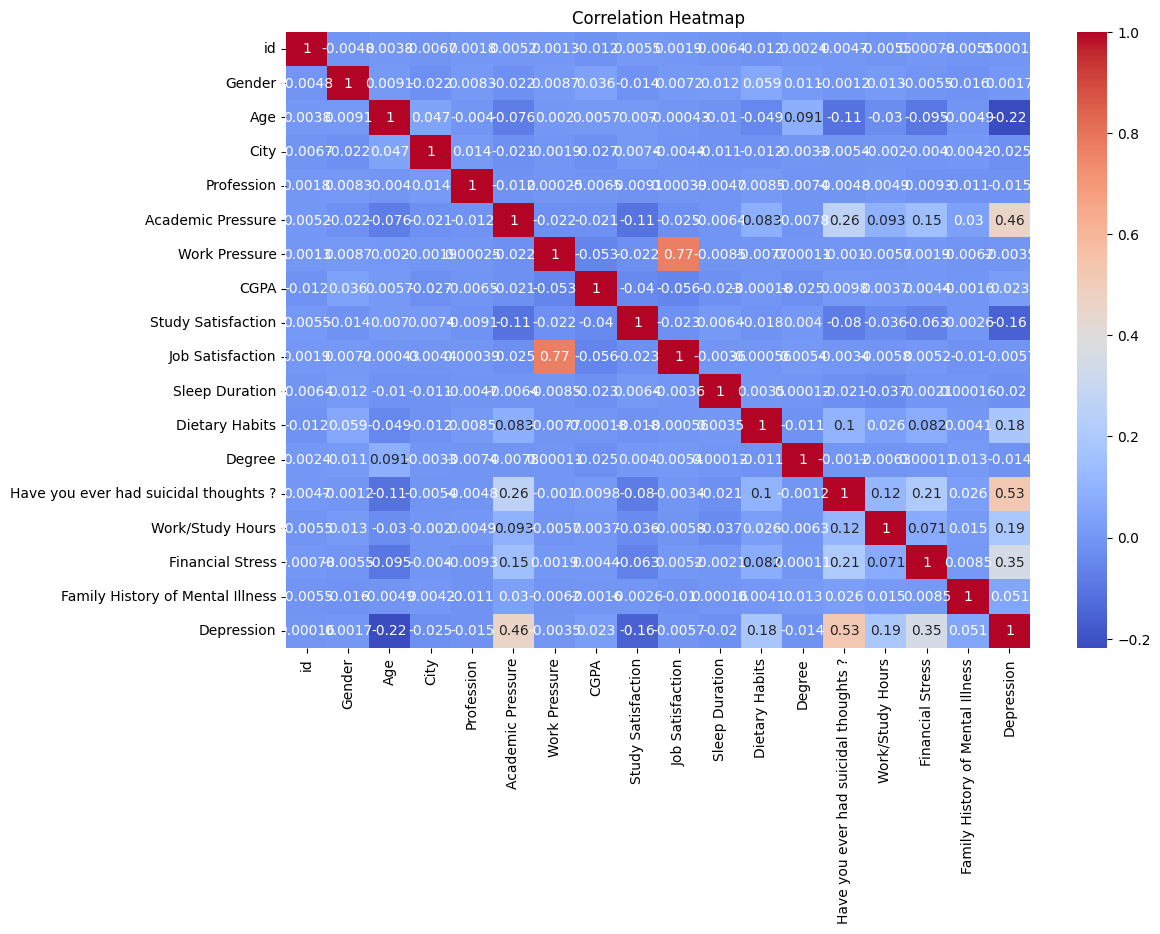

In [ ]:
# 3. Correlation heatmap
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Decide features based on correlation
# Assuming we drop features with low correlation with the target (Accident)
high_corr_features = corr['Depression'].abs().sort_values(ascending=False)
print("\nFeatures sorted by correlation with target:\n", high_corr_features)


Features sorted by correlation with target:
 Depression                               1.000000
Have you ever had suicidal thoughts ?    0.525252
Academic Pressure                        0.458366
Financial Stress                         0.351936
Age                                      0.218260
Work/Study Hours                         0.192140
Dietary Habits                           0.183813
Study Satisfaction                       0.160110
Family History of Mental Illness         0.051378
City                                     0.024808
CGPA                                     0.023472
Sleep Duration                           0.020261
Profession                               0.014966
Degree                                   0.014479
Job Satisfaction                         0.005742
Work Pressure                            0.003488
Gender                                   0.001738
id                                       0.000159
Name: Depression, dtype: float64


In [ ]:
# Keep features with correlation > 0.1 for demonstration purposes
selected_features = high_corr_features[high_corr_features > 0.1].index.tolist()
selected_features.remove('Depression')  # Exclude target
print("\nSelected features for prediction:\n", selected_features)


Selected features for prediction:
 ['Have you ever had suicidal thoughts ?', 'Academic Pressure', 'Financial Stress', 'Age', 'Work/Study Hours', 'Dietary Habits', 'Study Satisfaction']


In [ ]:
# 4. Scale features
scaler = StandardScaler()
data[selected_features] = scaler.fit_transform(data[selected_features])

print("\nScaled features:\n", data[selected_features].head())


Scaled features:
    Have you ever had suicidal thoughts ?  Academic Pressure  Financial Stress  \
0                               0.761745           1.345543         -1.488868   
1                              -1.312775          -0.826104         -0.793092   
2                              -1.312775          -0.102222         -1.488868   
3                               0.761745          -0.102222          1.294237   
4                               0.761745           0.621660         -1.488868   

        Age  Work/Study Hours  Dietary Habits  Study Satisfaction  
0  1.463165         -1.162874       -1.250531           -0.719982  
1 -0.371474         -1.162874       -0.455239            1.562497  
2  1.055467          0.515167       -1.250531            1.562497  
3  0.443921         -0.883201       -0.455239           -0.719982  
4 -0.167625         -1.722221       -0.455239            0.040844  


In [ ]:
# 5. Split dataset
data['Depression'] = data['Depression'].astype(int)
X = data[selected_features]
y = data['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 6. Train 3 models
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}

model_accuracies = {}
precisions = {}
recalls = {}
confusion_matrices = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store metrics
    model_accuracies[model_name] = accuracy_score(y_test, y_pred)
    precisions[model_name] = precision_score(y_test, y_pred)
    recalls[model_name] = recall_score(y_test, y_pred)
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)

KNN Accuracy: 78%
Decision Tree Accuracy: 71%
Logistic Regression Accuracy: 80%


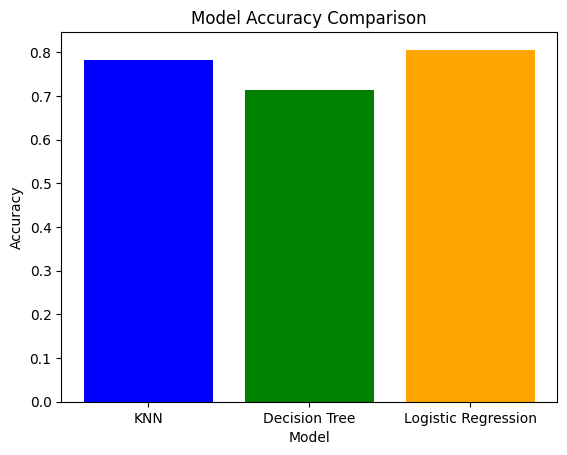

In [ ]:
# 7. Compare model accuracy
for model_name, accuracy in model_accuracies.items():
    accuracy=str(accuracy)
    print(f'{model_name} Accuracy: {accuracy[2:4]}%')

plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

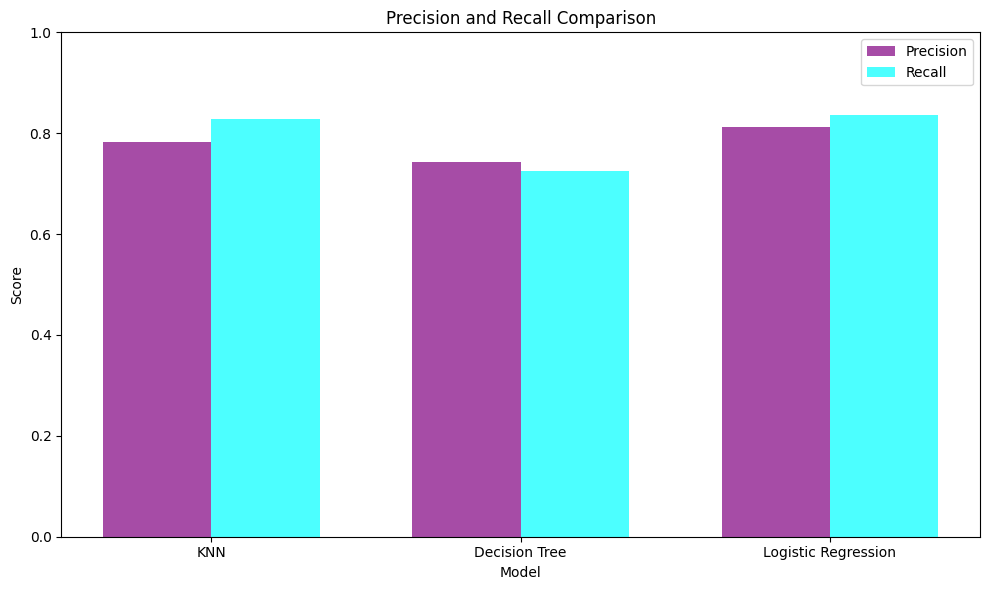

In [ ]:
# 8. Precision and Recall comparison
labels = list(precisions.keys())  # Model names
precision_values = list(precisions.values())  # Precision scores
recall_values = list(recalls.values())  # Recall scores

x = np.arange(len(labels))  # Label positions for the bar chart
width = 0.35  # Width of the bars

plt.figure(figsize=(10, 6))

# Plot Precision bars
plt.bar(x - width/2, precision_values, width, label='Precision', color='purple', alpha=0.7)

# Plot Recall bars
plt.bar(x + width/2, recall_values, width, label='Recall', color='cyan', alpha=0.7)

# Add labels, title, and legend
plt.xticks(x, labels)
plt.title('Precision and Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)  # Ensure scores are within 0 and 1
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


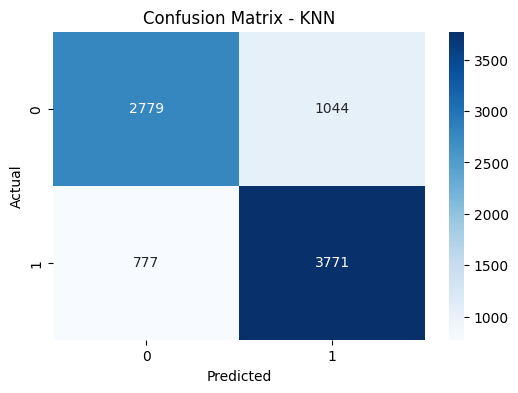

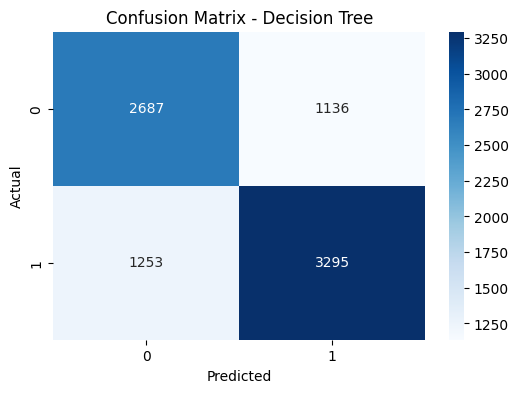

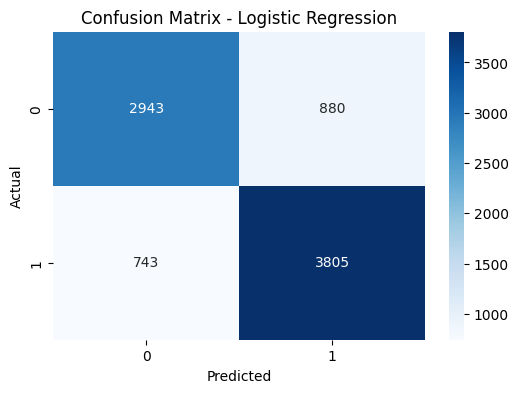

In [ ]:
# 9. Confusion matrix for each model
for model_name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()